# Plots

In [61]:
%matplotlib inline

In [62]:
import matplotlib.pyplot as plt
import os
import pandas as pd

## Load the Timings

For each class of machine, load the data.

In [167]:
basedir = '../outputs/parallel_timings/hyperthreading'
vectors = ['addiction', 'age', 'foi', 'mcsims', 'years']

In [168]:
timings = {
    k: {
        j: {}
        for j in ('stochastic', 'deterministic')
    }
    for k in vectors
}

for pwd, dirs, files in os.walk(basedir):
    csv_files = [f for f in files if os.path.splitext(f.lower())[-1] == '.csv']
    if len(csv_files) < 1:
        continue
    cores = int(os.path.basename(pwd).split('-')[0])
    for f in csv_files:
        df = pd.read_csv(os.path.join(pwd, f))
        sd, vector = os.path.splitext(f)[0].split('_')
        timings[vector][sd][cores] = df

Now, load the single-core versions.

In [169]:
basedir = '../outputs/timings'

In [170]:
for pwd, dirs, files in os.walk(basedir):
    csv_files = [f for f in files if os.path.splitext(f.lower())[-1] == '.csv']
    if len(csv_files) < 1:
        continue
    for f in csv_files:
        df = pd.read_csv(os.path.join(pwd, f))
        sd, vector = os.path.splitext(f)[0].split('_')
        timings[vector][sd][1] = df

## Plots for Each Vector

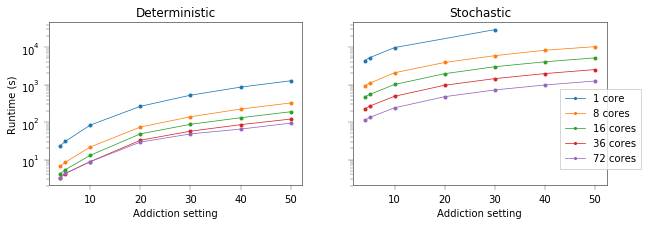

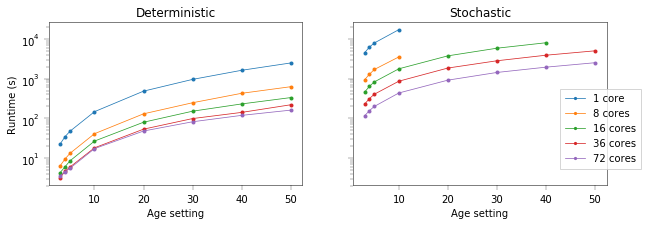

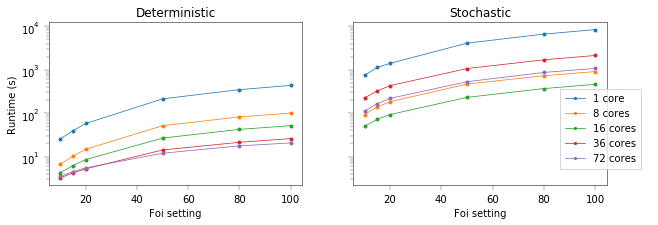

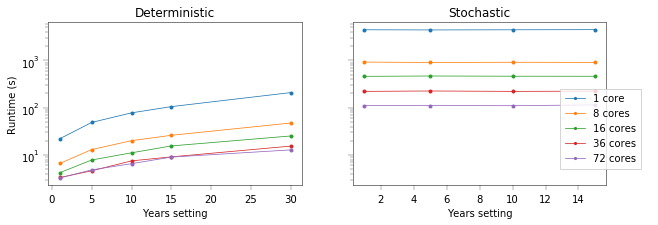

In [171]:
for vector in vectors:
    # Skip mcsims
    if vector == 'mcsims':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
    for i, sd in enumerate(('deterministic', 'stochastic')):
        for n in sorted(timings[vector][sd]):
            df = timings[vector][sd][n]
            # Fix years
            if vector == 'years':
                df = df[df.iloc[:,0] <= 30]
            
            # Label
            label = ''
            if i == 1:
                label = f'{n} core' + ('s' if n != 1 else '')
            
            # Plot
            axes[i].plot(df.iloc[:,0], df.iloc[:,1], '-o', label=label)
        
        # Axes
        if i == 0:
            axes[i].set_ylabel('Runtime (s)')
        axes[i].set_yscale('log')
        axes[i].set_title(sd.capitalize())
        axes[i].set_xlabel(vector.capitalize() + ' setting')
    fig.legend(loc=(0.85, 0.25))

## Scaling for Exemplar Models